Data set:
https://drive.google.com/open?id=1oPpVV8A_bROfReZCQP2AfgR3zIL_WeiA

(From Kaggle)-- https://www.kaggle.com/gilsousa/habermans-survival-data-set

Description:-
https://drive.google.com/open?id=1ee_Ux01UTqZOGQG4GP_FDDhUKWXj1-PF

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('haberman.csv')

In [3]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')  

### Analyse the above linked dataset as like iris data.

In [4]:
data.rename(columns={'30':'age'},inplace=True)
data.rename(columns={'64':'yr_of_op'},inplace=True)
data.rename(columns={'1':'pos_ax_node'},inplace=True)
data.rename(columns={'1.1':'survive_status'},inplace=True)

Q1-- Plot Histogram for all fearutes of the data set and write comments on which feature is best for predicting survival status.

(Hint: Use same process as did in iris data set.)

In [5]:
#Write your code here for ploting--

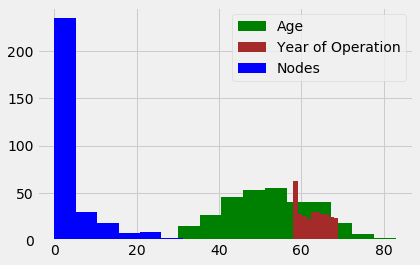

In [6]:
plt.style.use('fivethirtyeight')
plt.hist(data['age'],color='green',label='Age')
plt.hist(data['yr_of_op'],color='brown',label='Year of Operation')
plt.hist(data['pos_ax_node'],color='blue',label='Nodes')
plt.legend()
plt.show()

In [7]:
# Write your comments here--

As we can see from the histogram plot of all the features of the dataset 'Haberman', the feature Node (Number of positive axillary nodes detected) plotted in blue color, is not overlapping with the rest features. So, Node should be the best feature for predicting survival status. The worse feature will be Year of Operation, as it is completely overlapped with the feature Age.

Q2-- On the ipl wala dataset create a function which will accept a batsman name and 1 interger value and returns the number of runs he has after those many matches

E.g Input (V Kohli, 18)

Output - 678(Runs scored by Virat Kohli after 18 matches

In [8]:
# Give your comments here
def check(batsman_name=None,matches=0):
    runs_by_match = delivery[delivery['batsman']==batsman_name].groupby('match_id').sum()['batsman_runs']
    runs_by_match=runs_by_match.reset_index().reset_index()
    final=runs_by_match[runs_by_match['index']<matches]
    final_run=final['batsman_runs'].sum()
    return final_run

# The above function can be shorten as per the question, which is written below :
def check2(batsman_name=None,matches=0):
    runs_by_match = delivery[delivery['batsman']==batsman_name].groupby('match_id').sum()['batsman_runs']
    final_run = runs_by_match.head(matches).sum()
    return final_run

In [9]:
check2('MS Dhoni',12)

235

Q3: Write a function which will plot the match wise scores of two batsman in the form of a PDF, check this [image](https://drive.google.com/open?id=18y9DiuVvNZ3p5LIBv-eaDVxNtXrI7hp9)
<img src=""/>

In [10]:
def plot_scores(batsman1,batsman2):
    score1=delivery[delivery['batsman']==batsman1].groupby('match_id').sum()['batsman_runs']
    score2=delivery[delivery['batsman']==batsman2].groupby('match_id').sum()['batsman_runs']
    sns.kdeplot(score1)
    sns.kdeplot(score2)
    print('Blue for',batsman1,'and Red for',batsman2)
    plt.show()

Blue for V Kohli and Red for MS Dhoni


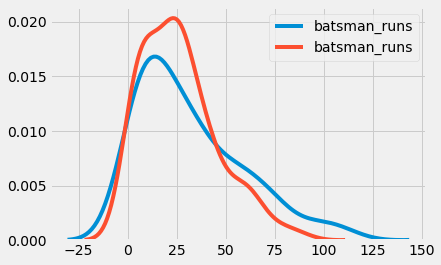

In [11]:
plot_scores('V Kohli','MS Dhoni')

Q3-- Write a function which will take a list as input and in return plot PDF and CDF curve as like in IRIS one.

     (you have to write your on logic for np.cumsum()--(cummulative sum- function) )

In [12]:
# Write your code here--
def graph(var):
    # cumsum funtion :
    def cumsum(temp):
        arr=temp[:]
        t=float(arr[0])
        for i in range(1,len(arr)):
            arr[i]=float(arr[i])+t
            t=float(arr[i])
        return arr
    # Code for the graph function.
    counts,bin_edges = np.histogram(var,bins=10)
    pdf=counts/sum(counts)
    cdf=cumsum(list(pdf))
    plt.style.use('fivethirtyeight')
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)

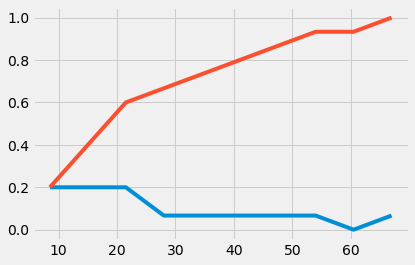

In [13]:
graph([2,6,9,12,3,16,38,16,29,45,49,10,17,22,67])